<a href="https://colab.research.google.com/github/Kevincancino26/Challenge-Telecom-X-an-lisis-de-evacion-de-clientes/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas a usar en el analisis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#📌 Extracción

In [210]:
url='https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df=pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df.tail()

,customerID,Churn,customer,phone,internet,account
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7266,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [ ]:
df_normalizado_customer = pd.json_normalize(
    data=df.to_dict(orient='records'),
    record_path=None,
    meta=['customerID', 'Churn'],
    errors='ignore'  #Si por alguna razón no encuentra alguna clave mencionada en meta, no lances un error. Solo ignora ese campo.
)

nuevos_nombres = {
    'customer.gender': 'genero del cliente',
    'customer.SeniorCitizen': 'cliente senior',
    'customer.Partner': 'cliente con pareja',
    'customer.Dependents': 'cliente con dependientes',
    'phone.PhoneService': 'cliente con servicio telefonico',
    'phone.MultipleLines': 'cliente con multiples lineas',
    'internet.InternetService': 'servicio de internet',
    'internet.OnlineSecurity': 'seguridad en linea',
    'internet.OnlineBackup': 'backup en linea',
    'internet.DeviceProtection': 'proteccion de dispositivo',
    'internet.TechSupport': 'soporte tecnico',
    'internet.StreamingTV': 'streaming tv',
    'internet.StreamingMovies': 'streaming movies',
    'account.Contract': 'Tipo de contrato',
    'account.PaperlessBilling': 'Facturacion en linea',
    'account.PaymentMethod': 'Metodo de pago',
    'account.Charges.Monthly': 'costo mensual',
    'account.Charges.Total': 'costo total',
    'customer.tenure':'Meses de contrato del cliente'
}

df_normalizado_customer=df_normalizado_customer.rename(columns=nuevos_nombres)
df_normalizado_customer.head()

,customerID,Churn,genero del cliente,cliente senior,cliente con pareja,cliente con dependientes,Meses de contrato del cliente,cliente con servicio telefonico,cliente con multiples lineas,servicio de internet,...,backup en linea,proteccion de dispositivo,soporte tecnico,streaming tv,streaming movies,Tipo de contrato,Facturacion en linea,Metodo de pago,costo mensual,costo total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
colums_df=list(df_normalizado_customer.columns)
colums_df

['customerID',
 'Churn',
 'genero del cliente',
 'cliente senior',
 'cliente con pareja',
 'cliente con dependientes',
 'Meses de contrato del cliente',
 'cliente con servicio telefonico',
 'cliente con multiples lineas',
 'servicio de internet',
 'seguridad en linea',
 'backup en linea',
 'proteccion de dispositivo',
 'soporte tecnico',
 'streaming tv',
 'streaming movies',
 'Tipo de contrato',
 'Facturacion en linea',
 'Metodo de pago',
 'costo mensual',
 'costo total']

In [ ]:
df_normalizado_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customerID                       7267 non-null   object 
 1   Churn                            7267 non-null   object 
 2   genero del cliente               7267 non-null   object 
 3   cliente senior                   7267 non-null   int64  
 4   cliente con pareja               7267 non-null   object 
 5   cliente con dependientes         7267 non-null   object 
 6   Meses de contrato del cliente    7267 non-null   int64  
 7   cliente con servicio telefonico  7267 non-null   object 
 8   cliente con multiples lineas     7267 non-null   object 
 9   servicio de internet             7267 non-null   object 
 10  seguridad en linea               7267 non-null   object 
 11  backup en linea                  7267 non-null   object 
 12  proteccion de dispos

In [ ]:
df_normalizado_customer['costo total']=df_normalizado_customer['costo total'].replace(' ',0.0)
df_normalizado_customer['costo total']=df_normalizado_customer['costo total'].astype(np.float64)
df_normalizado_customer['cliente senior']=df_normalizado_customer['cliente senior'].replace(0,'menor a 65 años').replace(1,'mayor a 65 años')

In [ ]:
df_normalizado_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customerID                       7267 non-null   object 
 1   Churn                            7267 non-null   object 
 2   genero del cliente               7267 non-null   object 
 3   cliente senior                   7267 non-null   object 
 4   cliente con pareja               7267 non-null   object 
 5   cliente con dependientes         7267 non-null   object 
 6   Meses de contrato del cliente    7267 non-null   int64  
 7   cliente con servicio telefonico  7267 non-null   object 
 8   cliente con multiples lineas     7267 non-null   object 
 9   servicio de internet             7267 non-null   object 
 10  seguridad en linea               7267 non-null   object 
 11  backup en linea                  7267 non-null   object 
 12  proteccion de dispos

In [ ]:
for col in df_normalizado_customer.columns:
  print(col)
  print(df_normalizado_customer[col].unique())

customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn
['No' 'Yes' '']
genero del cliente
['Female' 'Male']
cliente senior
['menor a 65 años' 'mayor a 65 años']
cliente con pareja
['Yes' 'No']
cliente con dependientes
['Yes' 'No']
Meses de contrato del cliente
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
cliente con servicio telefonico
['Yes' 'No']
cliente con multiples lineas
['No' 'Yes' 'No phone service']
servicio de internet
['DSL' 'Fiber optic' 'No']
seguridad en linea
['No' 'Yes' 'No internet service']
backup en linea
['Yes' 'No' 'No internet service']
proteccion de dispositivo
['No' 'Yes' 'No internet service']
soporte tecnico
['Yes' 'No' 'No internet service']
streaming tv
['Yes' 'No' 'No internet service']
streaming movies
['No' 'Yes' 'No internet service

In [ ]:
df_normalizado_customer.isnull().sum()

,0
customerID,0
Churn,0
genero del cliente,0
cliente senior,0
cliente con pareja,0
cliente con dependientes,0
Meses de contrato del cliente,0
cliente con servicio telefonico,0
cliente con multiples lineas,0
servicio de internet,0


In [ ]:
(df_normalizado_customer == ' ').sum()

,0
customerID,0
Churn,0
genero del cliente,0
cliente senior,0
cliente con pareja,0
cliente con dependientes,0
Meses de contrato del cliente,0
cliente con servicio telefonico,0
cliente con multiples lineas,0
servicio de internet,0


In [ ]:
(df_normalizado_customer == '').sum()

,0
customerID,0
Churn,224
genero del cliente,0
cliente senior,0
cliente con pareja,0
cliente con dependientes,0
Meses de contrato del cliente,0
cliente con servicio telefonico,0
cliente con multiples lineas,0
servicio de internet,0


In [ ]:
df_normalizado_customer['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [205]:
df_normalizado_customer['Churn']=df_normalizado_customer['Churn'].replace('','unkown')

In [ ]:
df_normalizado_customer['Churn'].unique()

array(['No', 'Yes', 'unkown'], dtype=object)

In [ ]:
(df_normalizado_customer == '').sum()

,0
customerID,0
Churn,0
genero del cliente,0
cliente senior,0
cliente con pareja,0
cliente con dependientes,0
Meses de contrato del cliente,0
cliente con servicio telefonico,0
cliente con multiples lineas,0
servicio de internet,0


In [216]:
for col in df_normalizado_customer.select_dtypes(include='object').columns:
  df_normalizado_customer[col]=df_normalizado_customer[col].str.lower().str.strip()

In [217]:
df_normalizado_customer.head()

,customerID,Churn,genero del cliente,cliente senior,cliente con pareja,cliente con dependientes,Meses de contrato del cliente,cliente con servicio telefonico,cliente con multiples lineas,servicio de internet,...,proteccion de dispositivo,soporte tecnico,streaming tv,streaming movies,Tipo de contrato,Facturacion en linea,Metodo de pago,costo mensual,costo total,costos diarios
0,0002-orfbo,no,female,menor a 65 años,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667
1,0003-mknfe,no,male,menor a 65 años,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,yes,male,menor a 65 años,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333
3,0011-igkff,yes,male,mayor a 65 años,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667
4,0013-exchz,yes,female,mayor a 65 años,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667


In [ ]:
df_normalizado_customer['costos diarios']=df_normalizado_customer['costo mensual']/30


##Tabla modificada (opncional)

In [ ]:
df_datos_modificados=df_normalizado_customer.copy()

In [ ]:
df_normalizado_customer['costo total']=df_normalizado_customer['costo total'].replace(' ',0.0)
df_datos_modificados=df_datos_modificados.replace('no','1').replace('yes','0')


In [ ]:
df_datos_modificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customerID                       7267 non-null   object 
 1   Churn                            7267 non-null   object 
 2   genero del cliente               7267 non-null   object 
 3   cliente senior                   7267 non-null   object 
 4   cliente con pareja               7267 non-null   object 
 5   cliente con dependientes         7267 non-null   object 
 6   Meses de contrato del cliente    7267 non-null   int64  
 7   cliente con servicio telefonico  7267 non-null   object 
 8   cliente con multiples lineas     7267 non-null   object 
 9   servicio de internet             7267 non-null   object 
 10  seguridad en linea               7267 non-null   object 
 11  backup en linea                  7267 non-null   object 
 12  proteccion de dispos

In [206]:
for col in df_datos_modificados.columns:
  if set(df_datos_modificados[col].unique())== {'0', '1'}:
    df_datos_modificados[col]=df_datos_modificados[col].astype(np.int64)



In [207]:
df_datos_modificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customerID                       7267 non-null   object 
 1   Churn                            7267 non-null   object 
 2   genero del cliente               7267 non-null   object 
 3   cliente senior                   7267 non-null   object 
 4   cliente con pareja               7267 non-null   int64  
 5   cliente con dependientes         7267 non-null   int64  
 6   Meses de contrato del cliente    7267 non-null   int64  
 7   cliente con servicio telefonico  7267 non-null   int64  
 8   cliente con multiples lineas     7267 non-null   object 
 9   servicio de internet             7267 non-null   object 
 10  seguridad en linea               7267 non-null   object 
 11  backup en linea                  7267 non-null   object 
 12  proteccion de dispos

#📊 Carga y análisis

In [ ]:
df_normalizado_customer_costos_redondeados=df_normalizado_customer.describe().round(2)
df_normalizado_customer_costos_redondeados

,Meses de contrato del cliente,costo mensual,costo total,costos diarios
count,7267.00,7267.00,7267.00,7267.00
mean,32.35,64.72,2277.18,2.16
std,24.57,30.13,2268.65,1.00
min,0.00,18.25,0.00,0.61
25%,9.00,35.42,396.20,1.18
50%,29.00,70.30,1389.20,2.34
75%,55.00,89.88,3778.52,3.00
max,72.00,118.75,8684.80,3.96


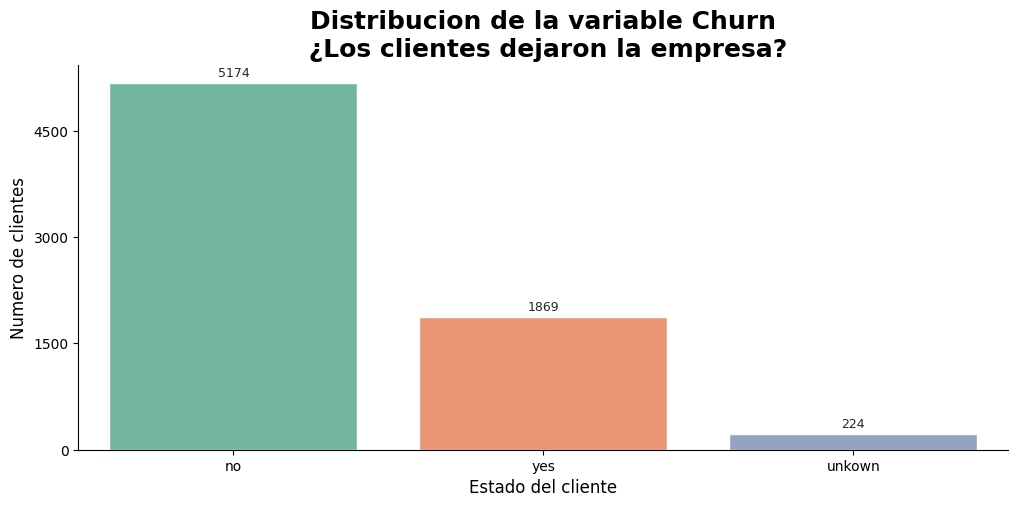

In [ ]:

churn_counts = df_normalizado_customer['Churn'].value_counts()
churn_df = churn_counts.reset_index()
churn_df.columns = ['Churn', 'Total']
# Crear la gráfica
fig,ax= plt.subplots(figsize=(12,5))
sns.set_theme(style='white')
bars=sns.barplot(data=churn_df, x='Churn', y='Total',hue='Churn', palette='Set2', legend=False)
for bar in bars.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(x, height + 50, f'{int(height)}', ha='center', va='bottom', fontsize=9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_locator(plt.MultipleLocator(1500))


ax.set_title('Distribucion de la variable Churn\n ¿Los clientes dejaron la empresa?',fontweight="bold",fontsize=18)
ax.set_xlabel('Estado del cliente',fontsize=12)
ax.set_ylabel('Numero de clientes',fontsize=12)


plt.show()

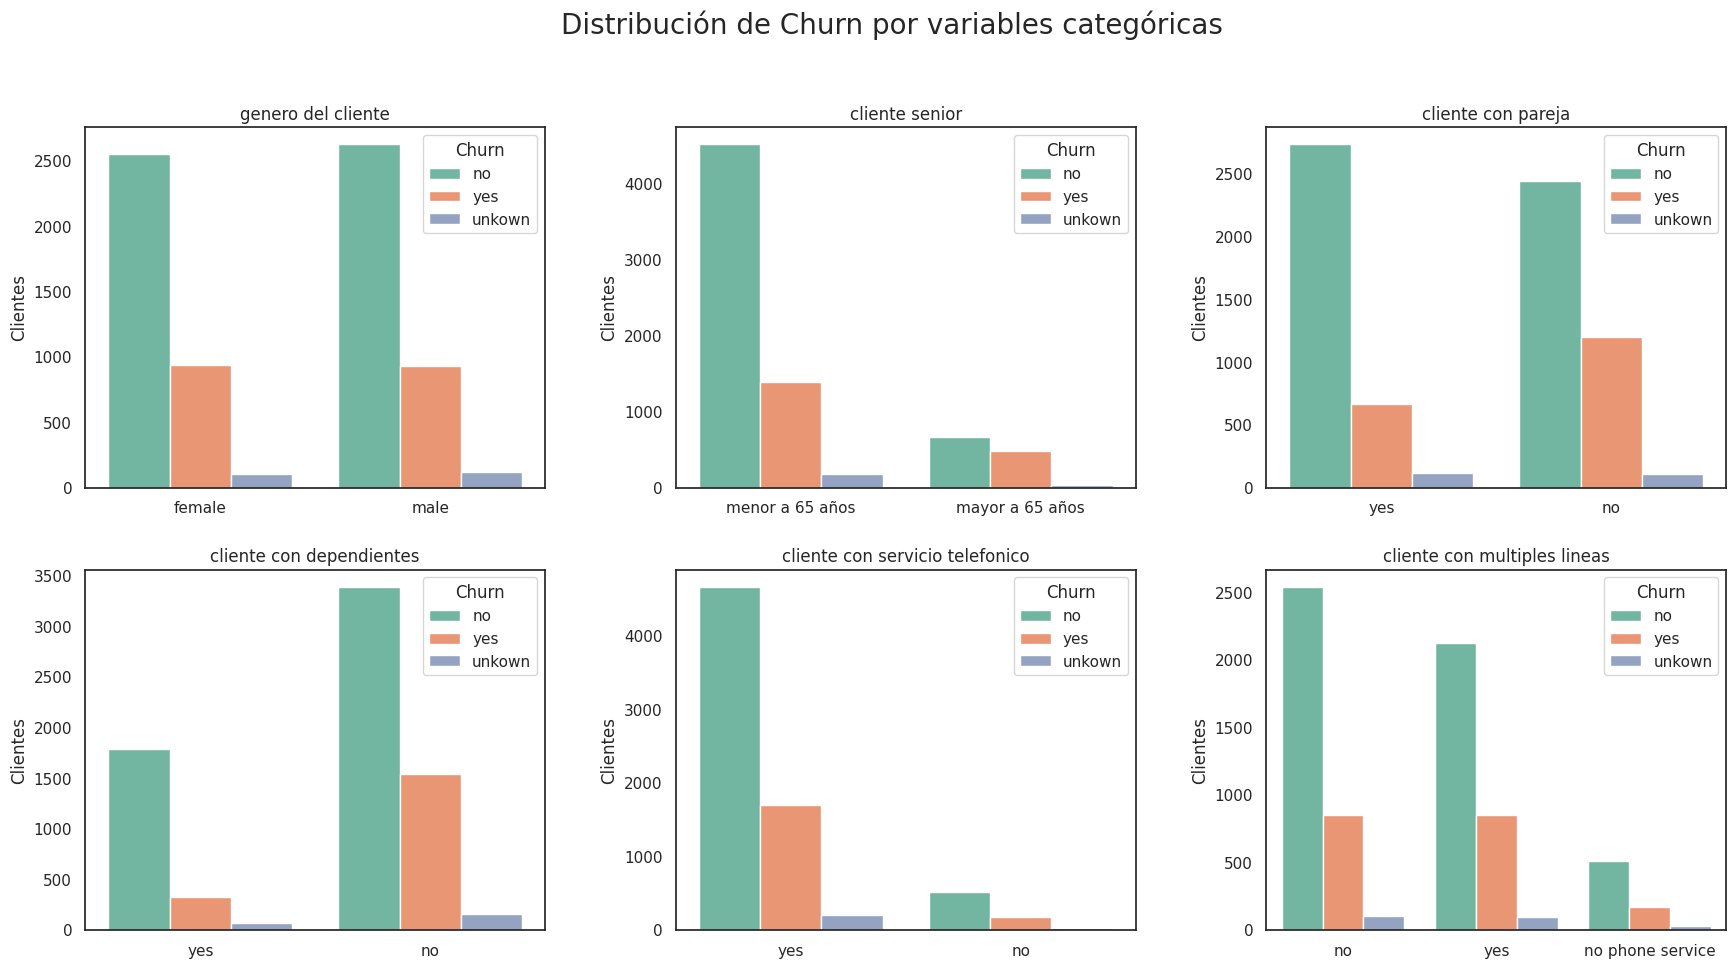

In [ ]:
# Lista de columnas categóricas que quieres analizar
columnas_categoricas = [
    'genero del cliente',
    'cliente senior',
    'cliente con pareja',
    'cliente con dependientes',
    'cliente con servicio telefonico',
    'cliente con multiples lineas',


]

# Crear figure y axes para 6 gráficos (3 filas x 6 columnas)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribución de Churn por variables categóricas', fontsize=20)
fig.subplots_adjust(hspace=10, wspace=5)
axs = axs.flatten()

# Crear cada gráfico
for i, columna in enumerate(columnas_categoricas):
    sns.countplot(data=df_normalizado_customer, x=columna, hue='Churn', palette='Set2', ax=axs[i])
    axs[i].set_title(f'{columna}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Clientes')
    axs[i].tick_params(axis='x')
    axs[i].legend(title='Churn', loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste del layout para dejar espacio al título
plt.show()

In [232]:
for col in columnas_categoricas:
    churn_percentage = (pd.crosstab(df_normalizado_customer[col], df_normalizado_customer['Churn'], normalize='index') * 100).round(2)
    print(f'\n{churn_percentage}')


Churn                  no  unkown    yes
genero del cliente                      
female              70.96    2.90  26.14
male                71.43    3.27  25.31

Churn               no  unkown    yes
cliente senior                       
mayor a 65 años  56.35    3.38  40.27
menor a 65 años  74.08    3.02  22.89

Churn                  no  unkown    yes
cliente con pareja                      
no                  65.11    2.88  32.01
yes                 77.69    3.30  19.02

Churn                        no  unkown    yes
cliente con dependientes                      
no                        66.65    3.01  30.34
yes                       81.80    3.26  14.95

Churn                               no  unkown    yes
cliente con servicio telefonico                      
no                               72.42    3.54  24.05
yes                              71.07    3.03  25.90

Churn                            no  unkown    yes
cliente con multiples lineas                      
no      

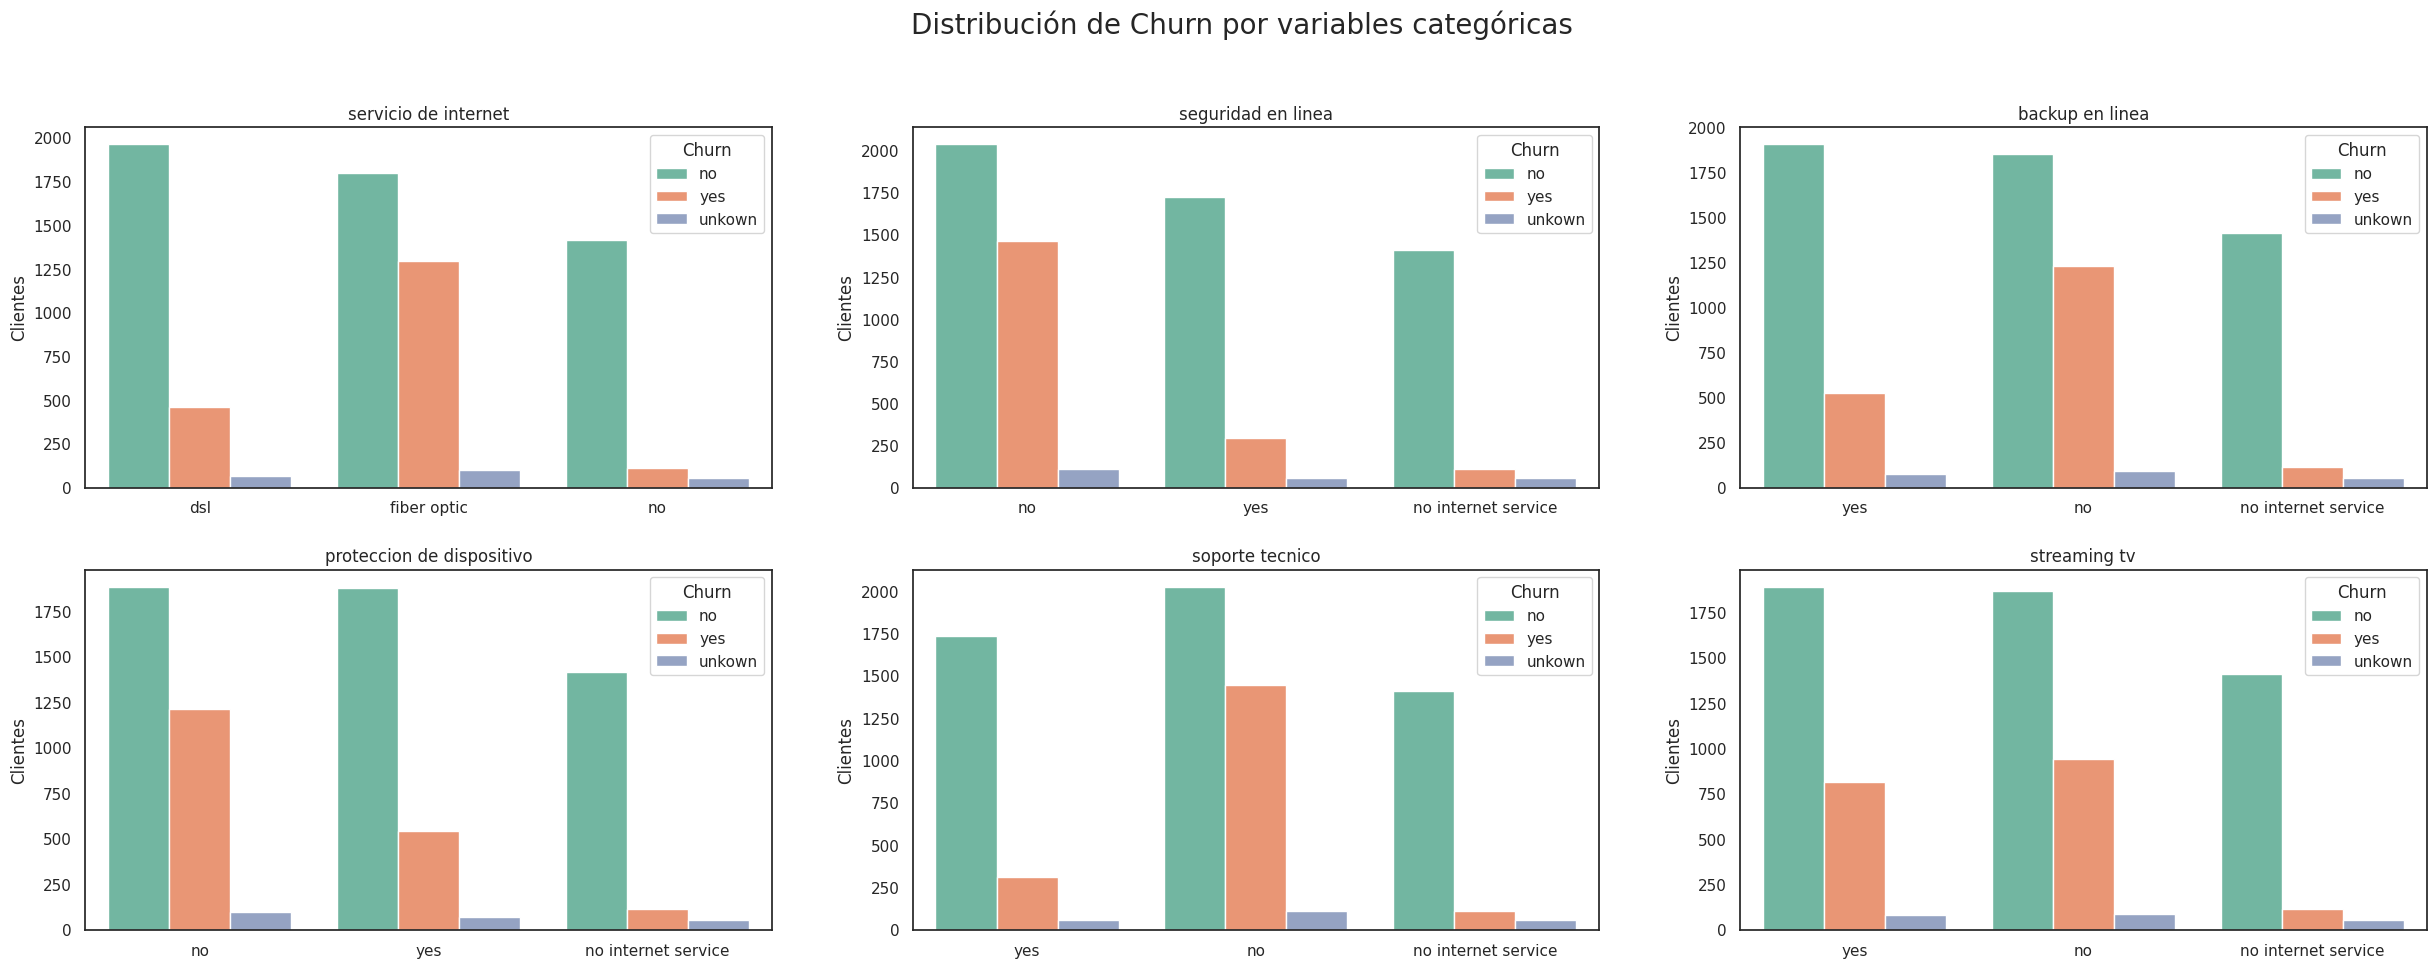

In [227]:
columnas_categoricas2 =['servicio de internet',
    'seguridad en linea',
    'backup en linea',
    'proteccion de dispositivo',
    'soporte tecnico',
    'streaming tv']
    # Crear figure y axes para 6 gráficos (3 filas x 6 columnas)
fig, axs = plt.subplots(2, 3, figsize=(25, 10))
fig.suptitle('Distribución de Churn por variables categóricas', fontsize=20)
fig.subplots_adjust(hspace=10, wspace=5)
axs = axs.flatten()

# Crear cada gráfico
for i, columna in enumerate(columnas_categoricas2):
    sns.countplot(data=df_normalizado_customer, x=columna, hue='Churn', palette='Set2', ax=axs[i])
    axs[i].set_title(f'{columna}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Clientes')
    axs[i].tick_params(axis='x')
    axs[i].legend(title='Churn', loc='upper right')


plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste del layout para dejar espacio al título
plt.show()


In [231]:
for col in columnas_categoricas2:
    churn_percentage = (pd.crosstab(df_normalizado_customer[col], df_normalizado_customer['Churn'], normalize='index') * 100).round(2)
    print(f'\n{churn_percentage}')


Churn                    no  unkown    yes
servicio de internet                      
dsl                   78.86    2.69  18.45
fiber optic           56.25    3.19  40.56
no                    89.37    3.48   7.15

Churn                   no  unkown    yes
seguridad en linea                       
no                   56.46    3.05  40.49
no internet service  89.37    3.48   7.15
yes                  82.96    2.84  14.20

Churn                   no  unkown    yes
backup en linea                          
no                   58.30    2.95  38.75
no internet service  89.37    3.48   7.15
yes                  76.12    3.00  20.89

Churn                         no  unkown    yes
proteccion de dispositivo                      
no                         58.97    3.13  37.90
no internet service        89.37    3.48   7.15
yes                        75.35    2.77  21.88

Churn                   no  unkown    yes
soporte tecnico                          
no                   56.59    3.04  

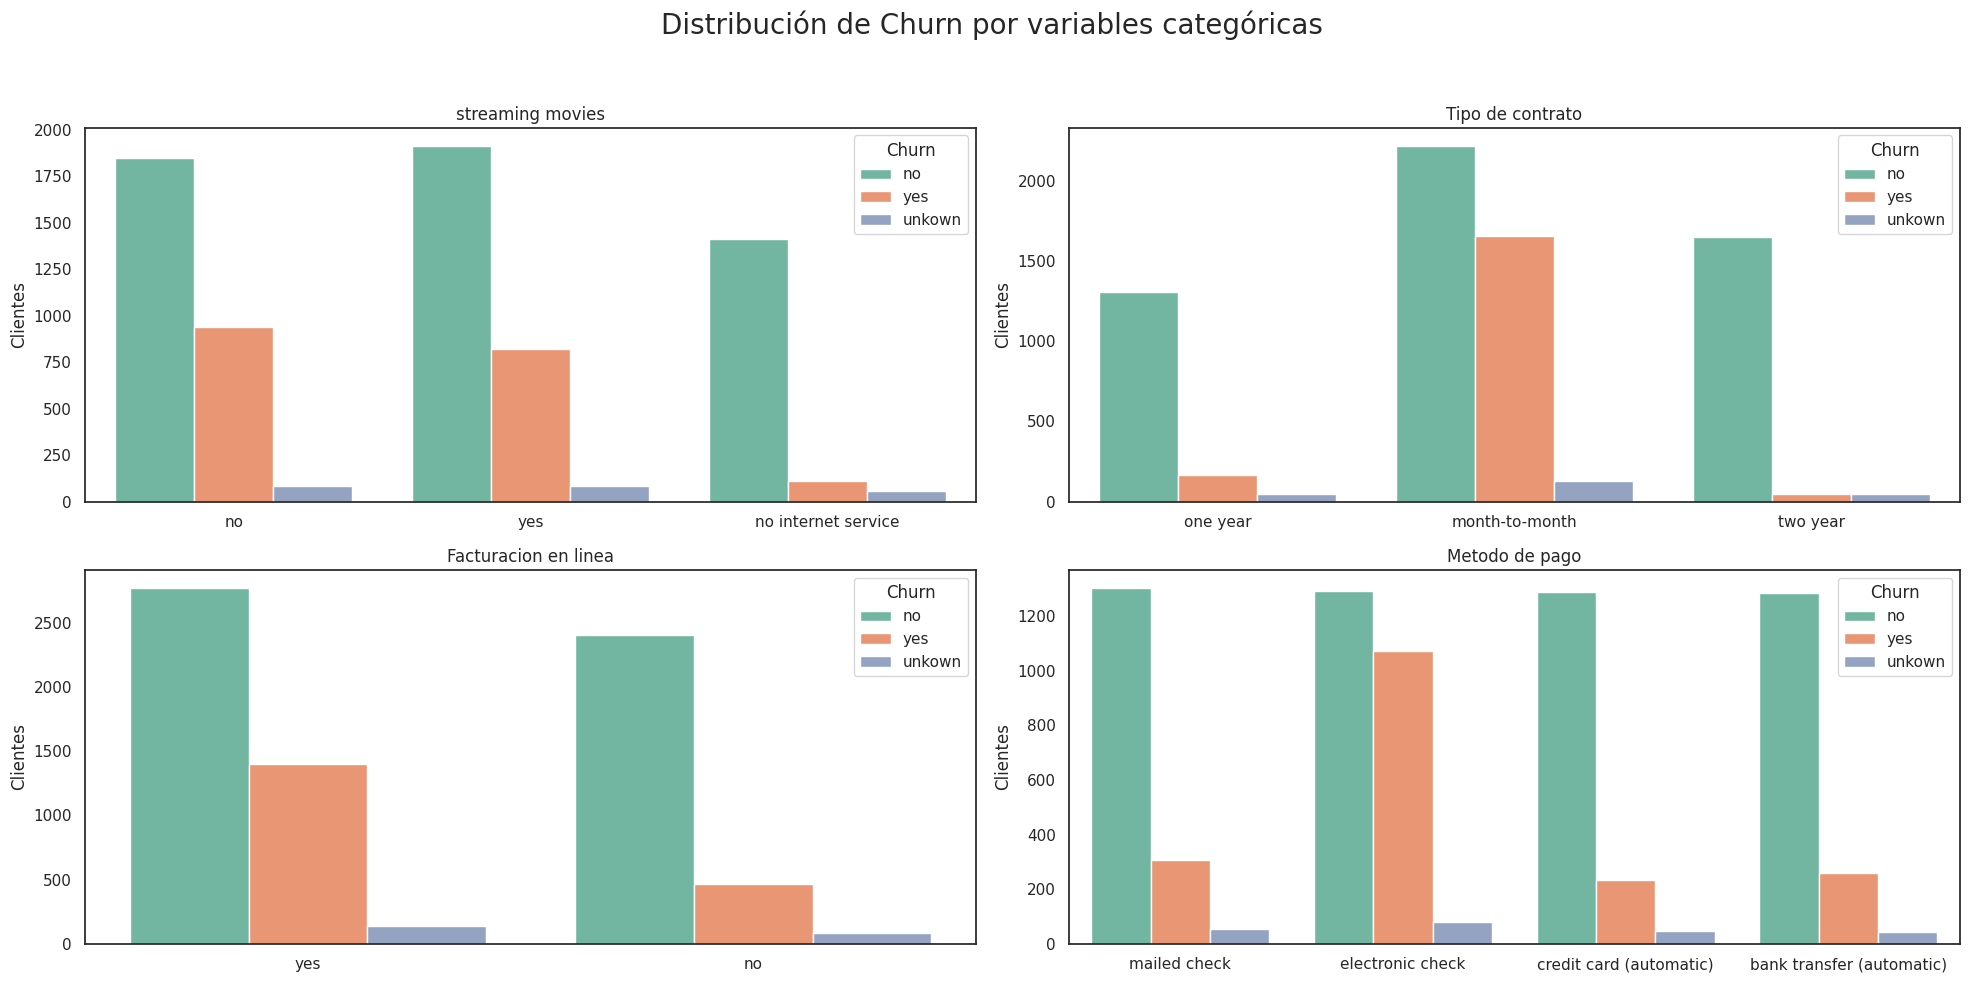

In [ ]:
columnas_categoricas3=['streaming movies',
    'Tipo de contrato',
    'Facturacion en linea',
    'Metodo de pago']

# Crear figure y axes para 6 gráficos (3 filas x 6 columnas)
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Distribución de Churn por variables categóricas', fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
axs = axs.flatten()

# Crear cada gráfico
for i, columna in enumerate(columnas_categoricas3):
    sns.countplot(data=df_normalizado_customer, x=columna, hue='Churn', palette='Set2', ax=axs[i])
    axs[i].set_title(f'{columna}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Clientes')
    axs[i].tick_params(axis='x', rotation=0)
    #axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=0, ha='right')
    axs[i].legend(title='Churn', loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste del layout para dejar espacio al título
plt.show()

In [233]:
for col in columnas_categoricas3:
    churn_percentage = (pd.crosstab(df_normalizado_customer[col], df_normalizado_customer['Churn'], normalize='index') * 100).round(2)
    print(f'\n{churn_percentage}')


Churn                   no  unkown    yes
streaming movies                         
no                   64.36    2.96  32.68
no internet service  89.37    3.48   7.15
yes                  67.97    2.98  29.05

Churn                no  unkown    yes
Tipo de contrato                      
month-to-month    55.43    3.25  41.32
one year          86.04    3.03  10.93
two year          94.49    2.75   2.75

Churn                    no  unkown    yes
Facturacion en linea                      
no                    81.29    2.84  15.87
yes                   64.28    3.25  32.48

Churn                         no  unkown    yes
Metodo de pago                                 
bank transfer (automatic)  80.93    2.83  16.24
credit card (automatic)    82.27    2.93  14.80
electronic check           52.92    3.27  43.80
mailed check               78.32    3.18  18.50


<ipython-input-196-3562170915>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_normalizado_customer,


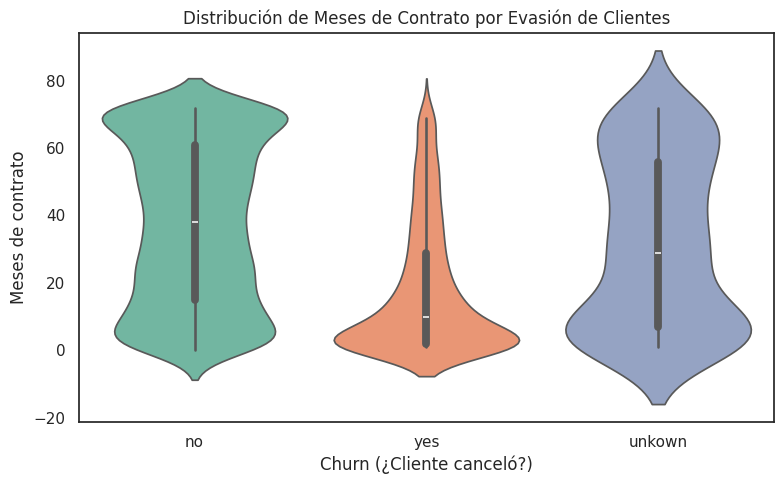

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_normalizado_customer,
               x='Churn',
               y='Meses de contrato del cliente',
               palette='Set2')
plt.title('Distribución de Meses de Contrato por Evasión de Clientes')
plt.xlabel('Churn (¿Cliente canceló?)')
plt.ylabel('Meses de contrato')
plt.tight_layout()
plt.show()

<ipython-input-236-4064057971>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_normalizado_customer,


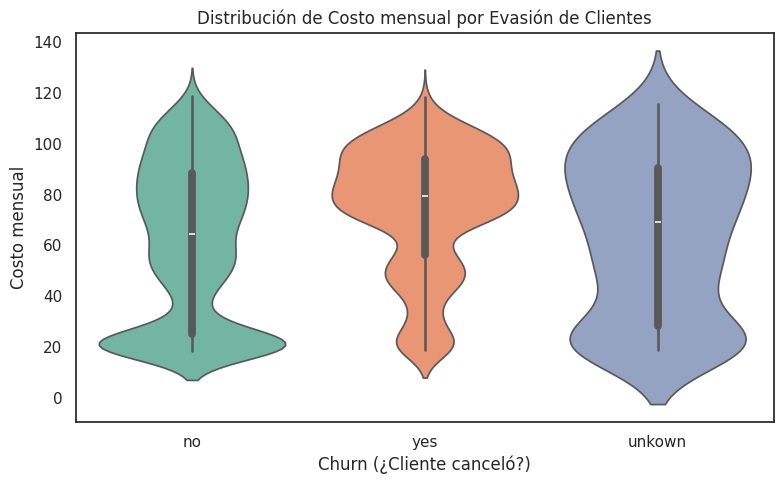

In [236]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_normalizado_customer,
               x='Churn',
               y='costo mensual',
               palette='Set2')
plt.title('Distribución de Costo mensual por Evasión de Clientes')
plt.xlabel('Churn (¿Cliente canceló?)')
plt.ylabel('Costo mensual')
plt.tight_layout()
plt.show()

<ipython-input-234-613786100>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_normalizado_customer,


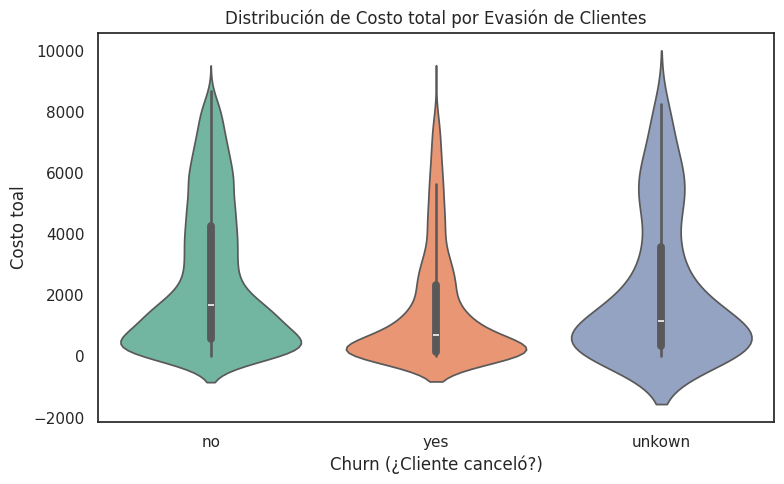

In [234]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_normalizado_customer,
               x='Churn',
               y='costo total',
               palette='Set2')
plt.title('Distribución de Costo total por Evasión de Clientes')
plt.xlabel('Churn (¿Cliente canceló?)')
plt.ylabel('Costo toal')
plt.tight_layout()
plt.show()

<ipython-input-235-1293738077>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_normalizado_customer,


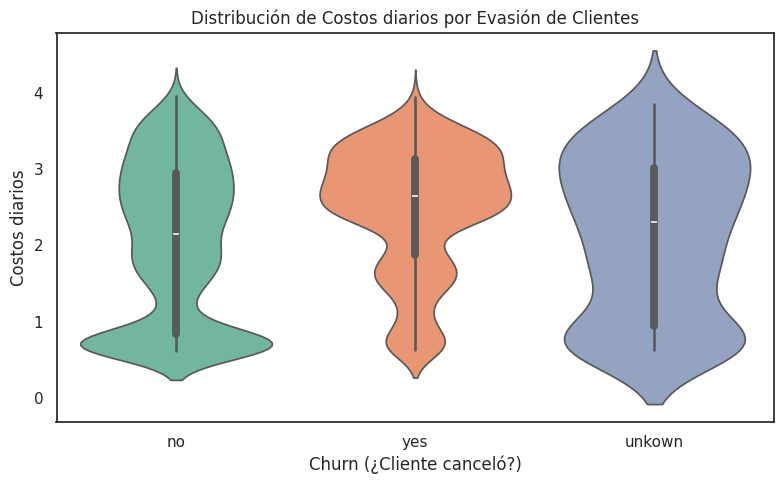

In [235]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_normalizado_customer,
               x='Churn',
               y='costos diarios',
               palette='Set2')
plt.title('Distribución de Costos diarios por Evasión de Clientes')
plt.xlabel('Churn (¿Cliente canceló?)')
plt.ylabel('Costos diarios')
plt.tight_layout()
plt.show()

#📄Informe final

NameError: name 'filas' is not defined